<a href="https://colab.research.google.com/github/Claudio577/colab-project/blob/main/Projeto_1_aprendendo_a_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fameworks

# Modelagem de dados
import pandas as pd # dados
import numpy as np # matrizes

# Análises Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Ajustes no Pandas
pd.set_option ('display.max_rows',100) # linhas
pd.set_option ('display.max_columns',100) # colunas

# Ajustes no matplot
plt.rcParams['figure.figsize'] = (15, 6) # Tamanho do gráfico
sns.set_style("darkgrid") # Estilo do gráfico


# **Imporação dos dados**

In [2]:
# Ler os dados

Dados_Livros = pd.read_csv('Books.csv')
Dados_Avaliacao = pd.read_csv('Ratings.csv')
Dados_Usuario = pd.read_csv('Users.csv')

# Dimencao [Linha,Coluna]
Dados_Livros.shape, Dados_Avaliacao.shape, Dados_Usuario.shape

((271360, 8), (1149780, 3), (278858, 3))

In [3]:
# Primeiras linhas

Dados_Livros.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Info
Dados_Livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
# Verificação

Dados_Avaliacao.head() # Avaliação de 0 até 10


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Info
Dados_Avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
# verificando
Dados_Usuario.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
# Info
Dados_Avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


# **Modelagem dos dados**

In [9]:
# Racional do Cruzamneto de Dados

# Primeiro Cruzamento
Tab_Cruzada = Dados_Livros.merge(Dados_Avaliacao, how='inner', on='ISBN')
# Segundo Cruzamento
Tab_Cruzada = Tab_Cruzada.merge(Dados_Usuario,how='inner', on='User-ID')
# Dimensao
Tab_Cruzada.shape

(1031136, 12)

In [10]:
# Verificar
Tab_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031134 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


In [11]:
'''
Investiganao dos ruindos na base
for Lina in Tab_Cruzada ['Year-Of-Publication'],valeu_counts().index:
  print(lina)

  Tab_Cruzada.loc ['Year-Of-Publication'] == 'DK Publishing Inc']
'''
# Ajustando o registro correto
Tab_Cruzada.iloc[959681,3] = ''
Tab_Cruzada.iloc[959682,3] = ''
Tab_Cruzada.iloc[974669,3] = ''
Tab_Cruzada.iloc[975881,3] = ''
# Converter a coluna ano
Tab_Cruzada['Year-Of-Publication'] = pd.to_numeric(Tab_Cruzada['Year-Of-Publication'])

In [12]:
# Formato das colunas
Tab_Cruzada.dtypes

,0
ISBN,object
Book-Title,object
Book-Author,object
Year-Of-Publication,float64
Publisher,object
Image-URL-S,object
Image-URL-M,object
Image-URL-L,object
User-ID,int64
Book-Rating,int64


In [13]:
# Verificação
Tab_Cruzada['Location'].head(5)

,Location
0,"stockton, california, usa"
1,"timmins, ontario, canada"
2,"ottawa, ontario, canada"
3,"n/a, n/a, n/a"
4,"sudbury, ontario, canada"


In [14]:
# Verificação
Tab_Cruzada['Location'].tail(5)

,Location
1031131,"providence, rhode island, usa"
1031132,"orem, utah, usa"
1031133,"hopewell junction, new york, usa"
1031134,"hopewell junction, new york, usa"
1031135,"hopewell junction, new york, usa"


In [15]:
def Extrair_Pais( Regiao ):
  '''
    Função para extrair o nome do pais na coluna região
  '''
  # Incluindo a inforção
  Registro = Regiao
  # Fatiar
  Registro = Regiao.split(',')
  # Buscar
  Fracao = Registro[-1].upper()
  #Retorno
  return Fracao

# Criando a coluna
Tab_Cruzada['Pais']=Tab_Cruzada['Location'].apply(Extrair_Pais)
# Verificação
Tab_Cruzada.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0,CANADA
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN,N/A
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",NaN,CANADA


In [16]:
# Nulos
Tab_Cruzada.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,4
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,4
User-ID,0
Book-Rating,0


In [17]:
# Campos Unicos

Tab_Cruzada.nunique()

,0
ISBN,270151
Book-Title,241071
Book-Author,101587
Year-Of-Publication,116
Publisher,16729
Image-URL-S,269842
Image-URL-M,269842
Image-URL-L,269839
User-ID,92106
Book-Rating,11


In [18]:
# Renomar as colunas
Tab_Cruzada.rename(
    columns={
        'Book-Title' : 'Titulo',
        'Book-Author' : 'Autor',
        'Year-Of-Publication' : 'Ano_Publicacao',
        'Publisher' : 'Editora',
        'User-ID' :'Id_Cliente',
        'Book-Rating' : 'Avaliacao',
        'Location' : 'Localizacao',
        'Age' : 'Idade'
    }, inplace=True
)

# Verificar
Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Id_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

# **Data Vizualization-Exploração**

In [19]:
# Analise descritiva
Tab_Cruzada.describe()

,Ano_Publicacao,Id_Cliente,Avaliacao,Idade
count,1.031132e+06,1.031136e+06,1.031136e+06,753301.000000
mean,1.968195e+03,1.405945e+05,2.839051e+00,37.397648
std,2.311015e+02,8.052466e+04,3.854157e+00,14.098254
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000
25%,1.992000e+03,7.041500e+04,0.000000e+00,28.000000
50%,1.997000e+03,1.412100e+05,0.000000e+00,35.000000
75%,2.001000e+03,2.114260e+05,7.000000e+00,45.000000
max,2.050000e+03,2.788540e+05,1.000000e+01,244.000000


In [20]:
# Remover as avaliações zeradas
Tab_Cruzada=Tab_Cruzada.loc[Tab_Cruzada['Avaliacao']>0]

# Verificar
Tab_Cruzada.isnull().sum(),Tab_Cruzada.shape

(ISBN                   0
 Titulo                 0
 Autor                  2
 Ano_Publicacao         1
 Editora                2
 Image-URL-S            0
 Image-URL-M            0
 Image-URL-L            1
 Id_Cliente             0
 Avaliacao              0
 Localizacao            0
 Idade             114221
 Pais                   0
 dtype: int64,
 (383842, 13))

In [21]:
# Verificacao
Tab_Cruzada['Avaliacao'].describe()

,Avaliacao
count,383842.000000
mean,7.626701
std,1.841339
min,1.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,10.000000


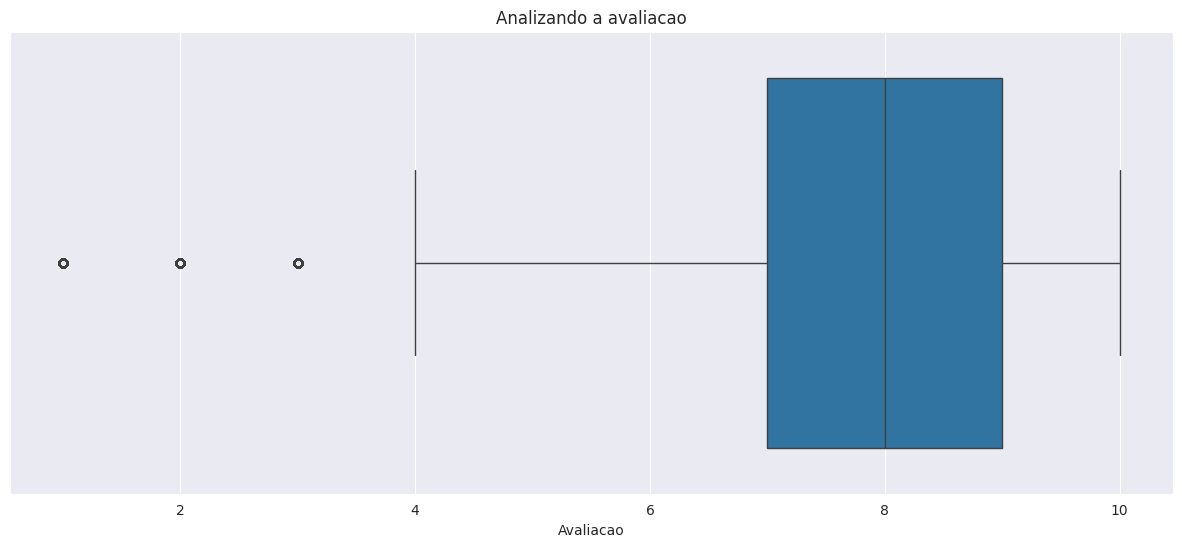

In [22]:
# Analize de gráfico
plt.title('Analizando a avaliacao')
sns.boxplot(data=Tab_Cruzada,x='Avaliacao');


In [23]:
# Analise
Analise = Tab_Cruzada.groupby( by=['Titulo'] ).agg(
    Quantidade = ('Titulo','count'),
    Media = ('Avaliacao','mean'),
    Max = ('Avaliacao','max'),
    Min = ('Avaliacao','min'),
    Mediana = ('Avaliacao','median'),
)
# Verificado
Analise.head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8,8,8.0
Dark Justice,1,10.000000,10,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,1,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10,10.0


In [24]:
# Verificar
Analise.sort_values(['Media', 'Quantidade' ], ascending=False ).head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
Postmarked Yesteryear: 30 Rare Holiday Postcards,11,10.0,10,10,10.0
The Sneetches and Other Stories,8,10.0,10,10,10.0
Natural California: A Postcard Book,7,10.0,10,10,10.0
Uncle John's Supremely Satisfying Bathroom Reader (Uncle John's Bathroom Reader),7,10.0,10,10,10.0
"Oh, the Thinks You Can Think! (I Can Read It All by Myself Beginner Books)",6,10.0,10,10,10.0


In [25]:
# Analise Qtd x Avaliacao

px.scatter(
    #dados
    data_frame = Analise,
    #Parametros
    x = 'Quantidade', y= 'Media',
    #Titulo
    title = 'Media X Quantidade - Titulo',
    #Upgrade
    marginal_y='rug', marginal_x='histogram'
)

In [26]:
# Corelação
Analise.corr()

,Quantidade,Media,Max,Min,Mediana
Quantidade,1.000000,0.018880,0.175572,-0.251497,0.036604
Media,0.018880,1.000000,0.889722,0.842385,0.989839
Max,0.175572,0.889722,1.000000,0.530760,0.887792
Min,-0.251497,0.842385,0.530760,1.000000,0.804023
Mediana,0.036604,0.989839,0.887792,0.804023,1.000000


In [27]:
# Analise
Analise ['Quantidade'].describe()

,Quantidade
count,135567.000000
mean,2.831382
std,9.135691
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,707.000000


In [28]:

def Classificao_Quantidade(Quantidade):
    '''
    Agrupar a quantidade
    '''
    quantidade = int(Quantidade)

    if quantidade <= 5:
        return '1-5 Avaliações'
    elif quantidade <= 10:
        return '6-10 Avaliações'
    elif quantidade <= 50:
        return '11-50 Avaliações'
    elif quantidade <= 100:
        return '51-100 Avaliações'
    else:
        return '>100 Avaliações'

# Aplicação
Pizza = Analise['Quantidade'].apply(Classificao_Quantidade).value_counts(normalize=True)

# Transformar em DataFrame
Pizza = pd.DataFrame(Pizza).reset_index()
Pizza.columns = ['Faixa', 'Proporcao']

# Plot
fig = px.pie(
    data_frame=Pizza,
    names='Faixa',
  values='Proporcao',
    title='Divisão das Quantidades'
)

fig.show()



In [29]:
# Verificacao
Pizza

,Faixa,Proporcao
0,1-5 Avaliações,0.920010
1,6-10 Avaliações,0.042783
2,11-50 Avaliações,0.032589
3,51-100 Avaliações,0.003201
4,>100 Avaliações,0.001416


In [30]:
# Publicação
Analise_Ano = Tab_Cruzada['Ano_Publicacao'].value_counts().sort_index().reset_index()
# Verificação
Analise_Ano.head()

,Ano_Publicacao,count
0,0.0,5783
1,1376.0,1
2,1378.0,1
3,1806.0,1
4,1900.0,1


<BarContainer object of 105 artists>

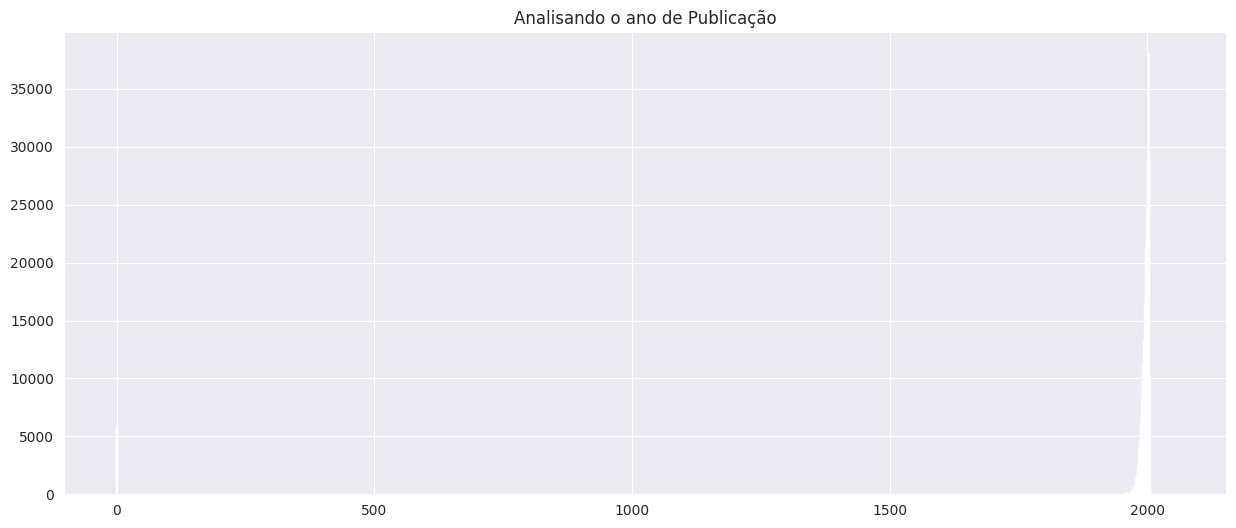

In [31]:
# plot
plt.title('Analisando o ano de Publicação')
plt.bar(Analise_Ano['Ano_Publicacao'], Analise_Ano['count'])

In [32]:
# Publicação
Analise_Ano =Tab_Cruzada['Ano_Publicacao'].value_counts().sort_index().reset_index()
# Verificando
Analise_Ano.describe()

,Ano_Publicacao,count
count,105.000000,105.000000
mean,1934.028571,3655.628571
std,210.090432,8051.797181
min,0.000000,1.000000
25%,1937.000000,4.000000
50%,1963.000000,63.000000
75%,1989.000000,1652.000000
max,2050.000000,37986.000000


<BarContainer object of 18 artists>

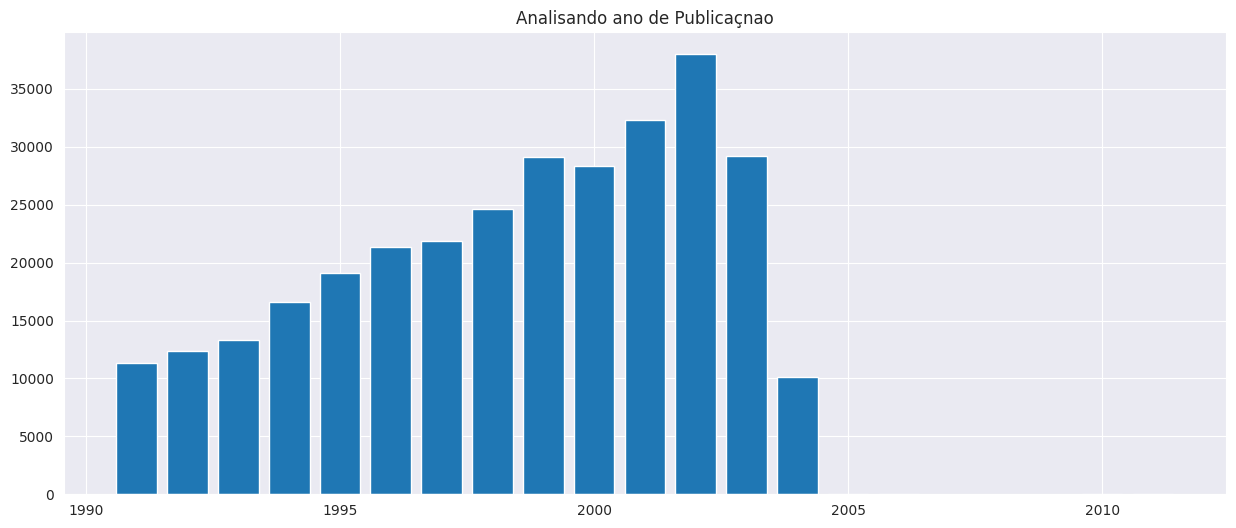

In [33]:
# Plot
# Filtrando o ano
Filtro = Analise_Ano.loc[ (Analise_Ano['Ano_Publicacao'] > 1990) & ( Analise_Ano['Ano_Publicacao'] < 2020 ) ]
# Plot
plt.title ('Analisando ano de Publicaçnao')
plt.bar(Filtro['Ano_Publicacao'],Filtro['count'])

In [34]:
# Ranking dos Autores
Tab_Cruzada.groupby(by= 'Autor').agg(
    Quantidade = ('Avaliacao','count'),
     Media = ('Avaliacao','mean'),
).sort_values('Quantidade', ascending=False).head(10)

,Quantidade,Media
Autor,,
Stephen King,4639,7.815046
Nora Roberts,2938,7.629680
John Grisham,2550,7.523137
James Patterson,2387,7.697947
J. K. Rowling,1746,8.970218
Mary Higgins Clark,1677,7.503280
Janet Evanovich,1490,7.944966
Dean R. Koontz,1475,7.572203
Anne Rice,1245,7.387952


In [35]:
# Concetração das avaliações
Tab_Cruzada['Pais'].value_counts(normalize=True).head(10)*100

,proportion
Pais,
USA,68.378135
CANADA,9.267876
UNITED KINGDOM,3.854190
GERMANY,3.165625
,2.737845
SPAIN,1.874990
AUSTRALIA,1.821322
N/A,1.811943
FRANCE,1.207789


In [36]:
# Concetração das avaliações
Tab_Cruzada['Pais'].value_counts(normalize=True).cumsum().head(10)*100

,proportion
Pais,
USA,68.378135
CANADA,77.646011
UNITED KINGDOM,81.500201
GERMANY,84.665826
,87.403671
SPAIN,89.278662
AUSTRALIA,91.099984
N/A,92.911927
FRANCE,94.119716


<Axes: title={'center': 'Análise das Idades'}, xlabel='Idade'>

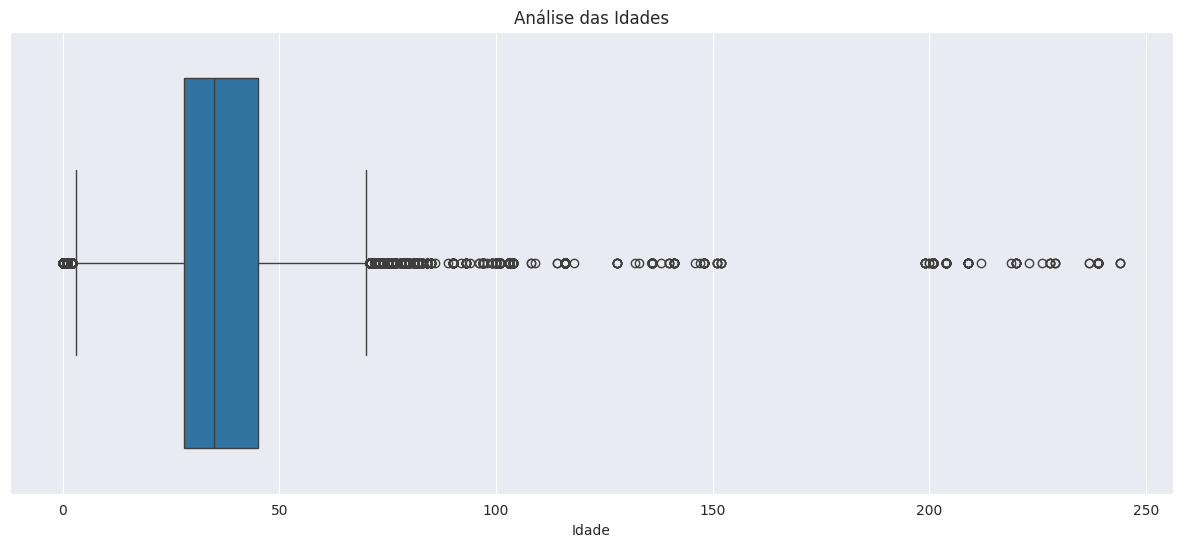

In [37]:
# Idade
plt.title ('Análise das Idades')
sns.boxplot(data=Tab_Cruzada, x='Idade')

# **Contrução do Modelo**

In [38]:
# Ajustar ( Avaliação dos Livros --> Tab_Cruzada)

# Ajustando a Tabela de Avaliações
Avaliacoes = Analise.reset_index().iloc[:,0:2]
# Cruzamento dos dados
Tab_Final=Tab_Cruzada.merge(Avaliacoes,how='inner',on='Titulo')
# Verificacao
Tab_Final.head()

,ISBN,Titulo,Autor,Ano_Publicacao,Editora,Image-URL-S,Image-URL-M,Image-URL-L,Id_Cliente,Avaliacao,Localizacao,Idade,Pais,Quantidade
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA,9
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN,N/A,9
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8,"toronto, ontario, canada",30.0,CANADA,9
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9,"ottawa, ,",NaN,,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629,9,"kingston, ontario, canada",NaN,CANADA,9


In [39]:
# Filtrar
Livros_Avaliados=Tab_Final.loc[Tab_Final['Quantidade']>=50]
# Dimensão
Livros_Avaliados.shape

(65477, 14)

In [40]:
# Duplicados
Livros_Avaliados.duplicated().sum()


np.int64(0)

In [41]:
# Gerar Matriz

Matriz = Livros_Avaliados.pivot_table(values='Avaliacao',index='Titulo',columns='Id_Cliente')

# Retirar os NaN
Matriz.fillna(0,inplace=True)
# Verificar
Matriz.head()

Id_Cliente,9,16,26,32,42,51,91,97,99,114,125,165,169,183,185,224,226,242,243,244,254,256,272,280,332,367,383,388,424,433,440,446,453,486,487,493,496,503,505,507,558,566,595,638,641,643,657,660,685,695,...,278325,278333,278342,278346,278350,278356,278390,278418,278422,278446,278469,278483,278522,278525,278535,278541,278543,278550,278551,278552,278554,278556,278561,278582,278586,278633,278641,278645,278653,278663,278672,278683,278698,278723,278732,278740,278755,278773,278786,278798,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
Titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Verificando
Tab_Cruzada.loc[Tab_Cruzada['Titulo']=='1984'].head()

,ISBN,Titulo,Autor,Ano_Publicacao,Editora,Image-URL-S,Image-URL-M,Image-URL-L,Id_Cliente,Avaliacao,Localizacao,Idade,Pais
94366,0451524934,1984,George Orwell,1990.0,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,254,9,"minneapolis, minnesota, usa",24.0,USA
94367,0451524934,1984,George Orwell,1990.0,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,1706,10,"olympia, washington, usa",26.0,USA
94368,0451524934,1984,George Orwell,1990.0,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,2179,8,"sunderland, massachusetts, usa",30.0,USA
94369,0451524934,1984,George Orwell,1990.0,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,2198,10,"philadelphia, pennsylvania, usa",NaN,USA
94370,0451524934,1984,George Orwell,1990.0,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,2799,10,"eugene, oregon, usa",NaN,USA


In [43]:
#Transformação para vetores

from scipy.sparse import csr_matrix

Matriz_sparse = csr_matrix(Matriz)
Matriz_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 65081 stored elements and shape (651, 24863)>

In [44]:
#Exemplo da função
csr_matrix ((4,4),dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [56]:
# Criar o modelo
from sklearn.neighbors import NearestNeighbors

# Parametro
Modelo = NearestNeighbors(
    #Quantidade de recomencações
    n_neighbors = 5,
# Tipo de algoritimo
    algorithm= 'brute',
# Metrica de distancia
    metric= 'minkowski'
)
# Fitar o Modelo
Modelo.fit(Matriz_sparse)

NearestNeighbors(algorithm='brute')

In [51]:
# Recomenadações

# Escolha livro

# Descobrir livros do Harry
for Posicao,Titulo in enumerate (Matriz.index):
  # Harry
  if 'Harry' in Titulo:
    print (Posicao,Titulo)

213 Harry Potter and the Chamber of Secrets (Book 2)
214 Harry Potter and the Goblet of Fire (Book 4)
215 Harry Potter and the Order of the Phoenix (Book 5)
216 Harry Potter and the Prisoner of Azkaban (Book 3)
217 Harry Potter and the Sorcerer's Stone (Book 1)
218 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In [66]:
# Selecionar o Livro #### CLIENTE COMPROU (DEPOIS DE UMA SUPOSTA PESQUISA TAMBEM) ESSE LIVRO !!!! ######
# SISTEMA DE FILTRAGEM COLABORATIVA / APRENDIZADO NAO SUPERIVISIONADO
Selecionar_Livro = Matriz.iloc[216,:].values.reshape(1,-1)

# Previsão do Modelo
Distancia,Recomendacao =Modelo.kneighbors(Selecionar_Livro)
# AVALIAÇAO / RENTABILIDADE / SERIES / NOTICIAS
#### RECOMENDAÇOES ####
# Ver as sugestões
for Loop in range (len(Recomendacao)):

  print(Matriz.index[Recomendacao[Loop]])

Index(['Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', '4 Blondes'],
      dtype='object', name='Titulo')


In [58]:
Distancia

array([[  0.        , 150.46714296, 150.8951991 , 158.7714115 ,
        165.39481384]])